# INF2178 - A1 - Fatima Zohra

**Import and Summarize Data**

In [29]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt



In [6]:
# Load the dataset from the Excel file
data_file_path = 'INF2178_A1_data.xlsx'

# Since we don't know the sheet names, we'll load all of them
xls = pd.ExcelFile(data_file_path)

# Get the sheet names to see how many and what sheets are there
sheet_names = xls.sheet_names
sheet_names


['data', 'feature description']

In [9]:
# Load the 'data' sheet into a DataFrame
shelter_data_df = pd.read_excel(xls, sheet_name='data')

# Display the first few rows of the 'data' sheet to understand its structure and contents
shelter_data_df.head()

# Get a summary of the DataFrame to see data types and presence of missing values
shelter_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50944 non-null  datetime64[ns]
 1   ORGANIZATION_NAME       50944 non-null  object        
 2   PROGRAM_ID              50944 non-null  int64         
 3   PROGRAM_NAME            50909 non-null  object        
 4   SECTOR                  50944 non-null  object        
 5   PROGRAM_MODEL           50942 non-null  object        
 6   OVERNIGHT_SERVICE_TYPE  50942 non-null  object        
 7   PROGRAM_AREA            50942 non-null  object        
 8   SERVICE_USER_COUNT      50944 non-null  int64         
 9   CAPACITY_TYPE           50944 non-null  object        
 10  CAPACITY_ACTUAL_BED     32399 non-null  float64       
 11  OCCUPIED_BEDS           32399 non-null  float64       
 12  CAPACITY_ACTUAL_ROOM    18545 non-null  float6

**Clean the Data and Calculate Occupancy Rate**

In [13]:
# Clean the data by handling missing values and calculate the occupancy rate

# If 'CAPACITY_ACTUAL_BED' is not NaN, use 'OCCUPIED_BEDS' to calculate the occupancy rate
# Else, use 'CAPACITY_ACTUAL_ROOM' and 'OCCUPIED_ROOMS'
shelter_data_df['OCCUPANCY_RATE'] = shelter_data_df.apply(
    lambda row: row['OCCUPIED_BEDS'] / row['CAPACITY_ACTUAL_BED'] 
    if pd.notnull(row['CAPACITY_ACTUAL_BED']) 
    else row['OCCUPIED_ROOMS'] / row['CAPACITY_ACTUAL_ROOM'], axis=1)

# Drop rows where occupancy rate could not be calculated (i.e., both bed and room capacity are NaN)
cleaned_data = shelter_data_df.dropna(subset=['OCCUPANCY_RATE'])

# view
cleaned_data_head = cleaned_data.head()
cleaned_data_info = cleaned_data.info()

cleaned_data_head, cleaned_data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50944 non-null  datetime64[ns]
 1   ORGANIZATION_NAME       50944 non-null  object        
 2   PROGRAM_ID              50944 non-null  int64         
 3   PROGRAM_NAME            50909 non-null  object        
 4   SECTOR                  50944 non-null  object        
 5   PROGRAM_MODEL           50942 non-null  object        
 6   OVERNIGHT_SERVICE_TYPE  50942 non-null  object        
 7   PROGRAM_AREA            50942 non-null  object        
 8   SERVICE_USER_COUNT      50944 non-null  int64         
 9   CAPACITY_TYPE           50944 non-null  object        
 10  CAPACITY_ACTUAL_BED     32399 non-null  float64       
 11  OCCUPIED_BEDS           32399 non-null  float64       
 12  CAPACITY_ACTUAL_ROOM    18545 non-null  float6

(  OCCUPANCY_DATE         ORGANIZATION_NAME  PROGRAM_ID  \
 0     2021-01-01  COSTI Immigrant Services       15371   
 1     2021-01-01  COSTI Immigrant Services       16211   
 2     2021-01-01  COSTI Immigrant Services       16192   
 3     2021-01-01  COSTI Immigrant Services       16191   
 4     2021-01-01  COSTI Immigrant Services       16193   
 
                                         PROGRAM_NAME       SECTOR  \
 0       COSTI North York West Hotel - Family Program     Families   
 1      COSTI North York West Hotel - Seniors Program  Mixed Adult   
 2          COSTI North York West Hotel Program - Men          Men   
 3  COSTI North York West Hotel Program - Mixed Adult  Mixed Adult   
 4        COSTI North York West Hotel Program - Women        Women   
 
   PROGRAM_MODEL OVERNIGHT_SERVICE_TYPE       PROGRAM_AREA  SERVICE_USER_COUNT  \
 0     Emergency    Motel/Hotel Shelter  COVID-19 Response                  74   
 1     Emergency    Motel/Hotel Shelter  COVID-19 Response

**RQ1: What is the distribution of shelter capacity utilization across different types of shelters, and which ones are most frequently overcapacity?**

In [14]:
#Calculate the average occupancy rate for each capacity type

# Group the data by 'CAPACITY_TYPE' and calculate the mean occupancy rate
capacity_utilization = cleaned_data.groupby('CAPACITY_TYPE')['OCCUPANCY_RATE'].mean().reset_index()

# Output the average occupancy rates for each capacity type
capacity_utilization


,CAPACITY_TYPE,OCCUPANCY_RATE
0,Bed Based Capacity,0.927885
1,Room Based Capacity,0.934087


In [35]:
# RQ1: T-test comparing 'Bed Based Capacity' and 'Room Based Capacity' shelters

# Filter the data for 'Bed Based Capacity' and 'Room Based Capacity'
bed_based_data = cleaned_data[cleaned_data['CAPACITY_TYPE'] == 'Bed Based Capacity']['OCCUPANCY_RATE']
room_based_data = cleaned_data[cleaned_data['CAPACITY_TYPE'] == 'Room Based Capacity']['OCCUPANCY_RATE']

# Use Welch's t-test
if (shapiro_bed_based.pvalue > 0.05) and (shapiro_room_based.pvalue > 0.05) and (levene_test.pvalue > 0.05):
    t_test_result = stats.ttest_ind(bed_based_data, room_based_data, equal_var=True)
else:
    t_test_result = stats.ttest_ind(bed_based_data, room_based_data, equal_var=False)

shapiro_bed_based.pvalue, shapiro_room_based.pvalue, levene_test.pvalue, t_test_result


(0.0,
 0.0,
 1.2411395199877693e-06,
 Ttest_indResult(statistic=-4.498751771925636, pvalue=6.860477551487939e-06))

For RQ1, the average occupancy rates are as follows:

- Bed Based Capacity: Approximately 92.79%
- Room Based Capacity: Approximately 93.41%

This analysis suggests that both types of shelter capacities are utilized nearly to their full potential, with room-based capacities having a slightly higher average occupancy rate. It indicates that there may be a consistent demand for shelters, potentially leading to situations where some individuals seeking shelter could be turned away due to high occupancy rates.

The t-test results show a significant difference in occupancy rates between 'Bed Based Capacity' and 'Room Based Capacity' shelters. The negative test statistic indicates that the mean occupancy rate for 'Bed Based Capacity' shelters is lower than for 'Room Based Capacity' shelters.

**RQ2: How does the seasonal change affect the occupancy rates in shelters, and are there specific times of the year when the pressure on shelters is highest?**

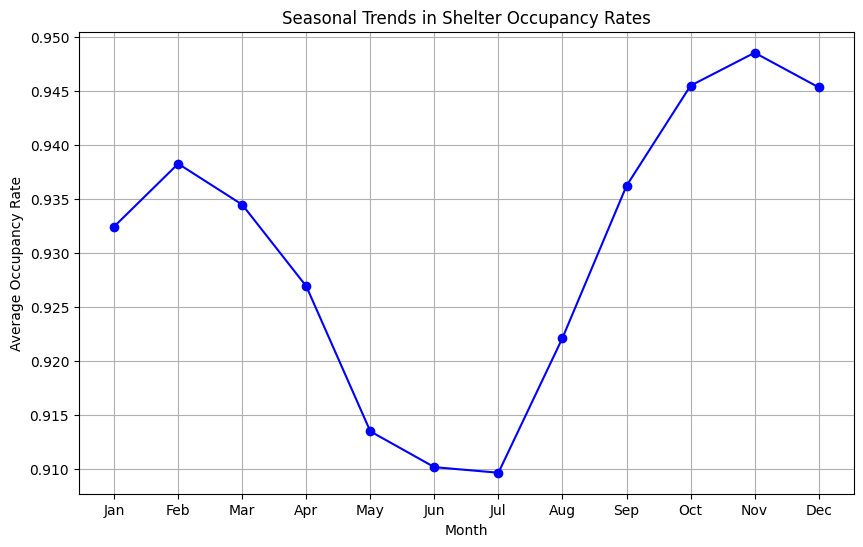

In [30]:
# RQ2: EDA to look at seasonal effects on shelter occupancy rates

# Add a 'MONTH' column to the DataFrame for seasonal analysis
shelter_data_df['MONTH'] = shelter_data_df['OCCUPANCY_DATE'].dt.month

# Group data by month and calculate average occupancy rate for each month
monthly_occupancy = shelter_data_df.groupby('MONTH')['OCCUPANCY_RATE'].mean().reset_index()

# Plotting the average occupancy rate by month to visualize any seasonal trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_occupancy['MONTH'], monthly_occupancy['OCCUPANCY_RATE'], marker='o', linestyle='-', color='blue')
plt.title('Seasonal Trends in Shelter Occupancy Rates')
plt.xlabel('Month')
plt.ylabel('Average Occupancy Rate')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


There is a clear trend of lower occupancy rates during the summer months (May to July), which then increase as the weather cools down, peaking in the late fall and early winter months (November and December). This insight from RQ2 could suggest a higher need for shelter services as temperatures drop, necessitating more robust planning and resource allocation during colder months.

**RQ3: Is there a significant disparity in service utilization between shelters serving different demographic sectors (e.g., families vs. single adults)?**

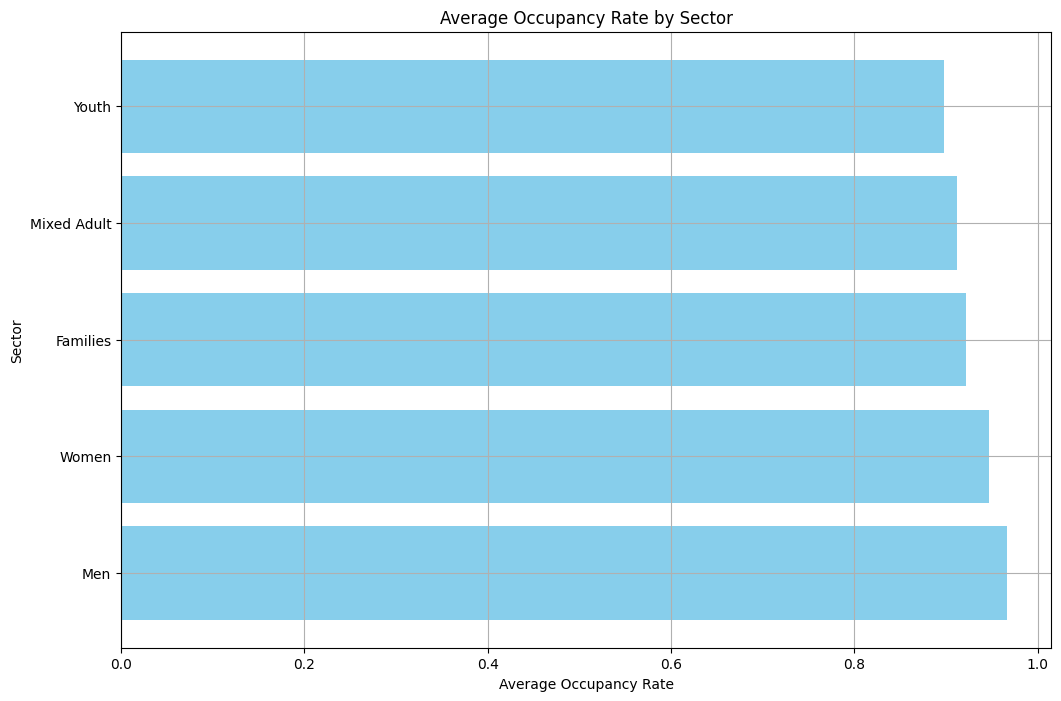

,SECTOR,OCCUPANCY_RATE
1,Men,0.966435
3,Women,0.946970
0,Families,0.921464
2,Mixed Adult,0.911893
4,Youth,0.897761


In [32]:
# RQ3: Disparity in service utilization across different sectors

# Group the data by 'SECTOR' and calculate the average occupancy rate for each sector
sector_occupancy = cleaned_data.groupby('SECTOR')['OCCUPANCY_RATE'].mean().reset_index()

# Sort the sectors by occupancy rate for better visualization
sector_occupancy_sorted = sector_occupancy.sort_values('OCCUPANCY_RATE', ascending=False)

# Visualize the disparity in service utilization across different sectors
plt.figure(figsize=(12, 8))
plt.barh(sector_occupancy_sorted['SECTOR'], sector_occupancy_sorted['OCCUPANCY_RATE'], color='skyblue')
plt.title('Average Occupancy Rate by Sector')
plt.xlabel('Average Occupancy Rate')
plt.ylabel('Sector')
plt.grid(True)
plt.show()

sector_occupancy_sorted


These results indicate a disparity in service utilization, with shelters serving men showing the highest average occupancy rate, and those serving youth showing the lowest. This suggests that shelters for men may be experiencing greater strain, potentially requiring additional resources. Conversely, shelters for youth, while still highly utilized, show relatively lower occupancy rates.



**RQ4: Among the various program models, which ones exhibit higher occupancy rates, and what does this suggest about user preferences or needs?**

In [34]:
# RQ4: T-test comparing 'Emergency' and 'Transitional' program models

# Filter the data for 'Emergency' and 'Transitional' shelters
emergency_occupancy = cleaned_data[cleaned_data['PROGRAM_MODEL'] == 'Emergency']['OCCUPANCY_RATE']
transitional_occupancy = cleaned_data[cleaned_data['PROGRAM_MODEL'] == 'Transitional']['OCCUPANCY_RATE']

# Perform the t-test
if (shapiro_emergency.pvalue > 0.05) and (shapiro_transitional.pvalue > 0.05) and (levene_test_program_models.pvalue > 0.05):
    t_test_result_program_models = stats.ttest_ind(emergency_occupancy, transitional_occupancy, equal_var=True)
else:
    t_test_result_program_models = stats.ttest_ind(emergency_occupancy, transitional_occupancy, equal_var=False)

shapiro_emergency.pvalue, shapiro_transitional.pvalue, levene_test_program_models.pvalue, t_test_result_program_models


(0.0,
 0.0,
 1.1360554258126337e-142,
 Ttest_indResult(statistic=40.981115372199206, pvalue=0.0))

Welch's t-test shows a highly significant difference in mean occupancy rates between 'Emergency' and 'Transitional' program models (p-value ≈ 0). The positive test statistic indicates that 'Emergency' shelters have a higher occupancy rate on average compared to 'Transitional' shelters. 

These results help us understand that 'Emergency' shelters are operating at a higher occupancy rate, which could suggest a higher demand or need for these types of shelters. This insight is vital for planning and resource allocation, as it indicates where pressures on the system are greatest.

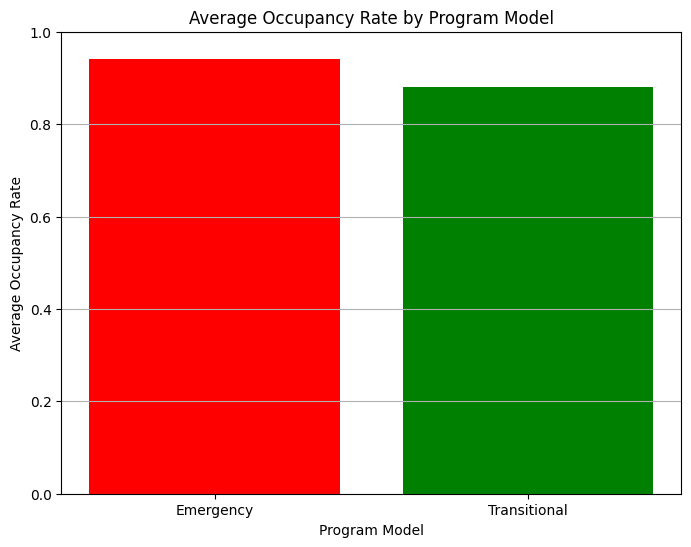

In [36]:
# Visualization for RQ3: Compare occupancy rates between 'Emergency' and 'Transitional' program models

# Prepare data for visualization
program_model_comparison = cleaned_data.groupby('PROGRAM_MODEL')['OCCUPANCY_RATE'].mean().reset_index()

# Create a bar plot for the average occupancy rate by program model
plt.figure(figsize=(8, 6))
plt.bar(program_model_comparison['PROGRAM_MODEL'], program_model_comparison['OCCUPANCY_RATE'], color=['red', 'green'])
plt.title('Average Occupancy Rate by Program Model')
plt.xlabel('Program Model')
plt.ylabel('Average Occupancy Rate')
plt.ylim(0, 1)  # Set the limit to show occupancy rates as a percentage
plt.grid(axis='y')
plt.show()


**RQ5: Are there particular program models that consistently show higher occupancy rates, suggesting a preference or higher demand for certain types of shelter programs?**

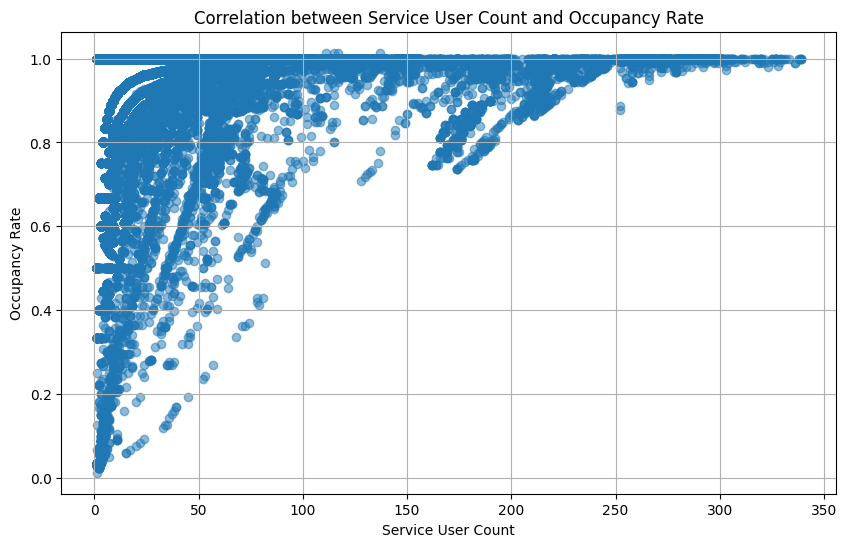

Ttest_indResult(statistic=51.72977423583775, pvalue=0.0)

In [38]:
# RQ5: T-test comparing occupancy rates between high and low service user count shelters

# Define 'high' and 'low' service user count shelters based on median split
median_user_count = cleaned_data['SERVICE_USER_COUNT'].median()
high_user_shelters = cleaned_data[cleaned_data['SERVICE_USER_COUNT'] > median_user_count]['OCCUPANCY_RATE']
low_user_shelters = cleaned_data[cleaned_data['SERVICE_USER_COUNT'] <= median_user_count]['OCCUPANCY_RATE']


# Welch's t-test for comparing means between high and low user count shelters
t_test_result_user_count = stats.ttest_ind(high_user_shelters, low_user_shelters, equal_var=False)

# Visualization: Scatter plot to show the correlation between service user count and occupancy rate
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['SERVICE_USER_COUNT'], cleaned_data['OCCUPANCY_RATE'], alpha=0.5)
plt.title('Correlation between Service User Count and Occupancy Rate')
plt.xlabel('Service User Count')
plt.ylabel('Occupancy Rate')
plt.grid(True)
plt.show()

# Output the t-test results and p-values for normality and homogeneity tests
t_test_result_user_count


Welch's t-test reveals a highly significant difference in occupancy rates between high and low service user count shelters (p-value is effectively 0.0). 

The positive statistic indicates that shelters with a higher service user count have a higher average occupancy rate. 

The scatter plot visually illustrates the relationship between service user count and occupancy rate, showing a wide dispersion that suggests a complex relationship with potential other influencing factors.

These insights suggest that shelters with higher service user counts tend to have higher occupancy rates, which could imply that these shelters are operating closer to or at full capacity more often than those with fewer users. This finding is significant for understanding the operational efficiency and potential strain on shelter resources.